# Вычислительная математика
## 2.4 Классификация. Нейронки

__Внимание.__ Этот блокнот лучше запускать на google colab. Библиотека `pytorch` весит около 5 гб, и не факт, что заработает на всех устройствах.

Содержание семинара:

1. __Задача классификации__
    - Определение
    - Логистическая регрессия
    - Метрики качества
        - Precision, Accuracy


2. __Построение многослойного персептрона__
    - Простой пример
    - Общая формулировка. Виды функций активации
    - Почему оно работает? Теорема Колмогорова-Арнольда
    
    
3. __Обучение перспетрона__
    - Обратное распространение ошибки
    - Dropout
    - Стохастический градиентный спуск
    
    
4. __Распознование рукописных цифр. Датасет MNIST. Реализация на torch__
    - Загрузка датасета
    - Беглый осмотр датасета
    - Определение модели
    - Обучение
    - Тест
    
    
5. __Домашнее задание__

## Задача классификации

__Определение.__ Классификация — это задача присваивания меток классов входным объектам. Входные данные чаще всего представляют собой векторы признаков, и на основе этих признаков алгоритм определяет, к какому классу относится каждый объект.

Иными словами, нужно зафитить $\left\{\left(x_i, y_i\right)\right\}_{i=1}^N$, где  $x_i \in \mathbb{R}^m, \; y_i \in \mathbb{Z}_p$ и $p$ - общее количество классов.

Отличается от кластеризации тем, что мы имеем лэйблы, на основе которых происходит и строится __классификатор__ (наша модель $\check{y})$.

### Логистическая регрессия

Для простоты положим случай двух классов, т.е. $y_i \in \{0, 1\}$.

В __логистической регрессии__ берётся следующая модель:

$$
\check y (x, w)=\operatorname{sign}\left(\sum_{j=1}^m w_j f_j(x)-w_0\right)=\operatorname{sign}\langle x, w\rangle
$$

где $w_j$ - вес $j$-го признака, $w_0$ - порог принятия решения, $w=\left(w_0, w_1, \ldots, w_m\right)$ - вектор весов, $\langle x, w\rangle-$ скалярное произведение признакового описания объекта на вектор весов. Предполагается, что искусственно введён «константный» нулевой признак: $f_0(x)=-1$.

Обучение модели (выбор наилучших весов) в данном случае производится с помощью минимизации __функции эмпирического риска__:
$$
Q(w)=\sum_{i=1}^N \ln \left(1+\exp \left(-y_i \cdot \left\langle x_i, w\right\rangle\right)\right) \rightarrow \min _w .
$$

После того, как решение $w$ найдено, становится возможным не только вычислять классификацию $\check y(x)=\operatorname{sign}\langle x, w\rangle$ для произвольного объекта $x$, но и оценивать апостериорные вероятности его принадлежности классам:



$$
\mathbb{P}\{y \mid x\}=\sigma(y\langle x, w\rangle), \quad y \in Y,
$$

где $\sigma(z)=\frac{1}{1+e^{-z}}-$ сигмоидная функция. Во многих приложениях апостериорные вероятности необходимы для оценивания рисков, связанных с возможными ошибками классификации.

__Примечание.__ Геометрически, мы строим разделяющую поверхность между объектами, принадлежащих к разным классам.

![](https://habrastorage.org/r/w1560/getpro/habr/post_images/555/369/344/5553693449d97a6ccb730f4760a2eacd.png)

### Метрики качества классификации

Для полноты картины лучше почитать https://academy.yandex.ru/handbook/ml/article/metriki-klassifikacii-i-regressii

После классификации все объекты можно разбить на 4 вида:

- __истинно положительные__ (__TP__, $y_i = 1, \check y_i = 1$)
- __истинно отрицательные__ (__TN__, $y_i = 0, \check y_i = 0$)
- __ложно положительные__ (__FP__, $y_i = 0, \check y_i = 1$)
- __ложно отрицательные__ (__FN__, $y_i = 1, \check y_i = 0$)

Для наглядности, можно построить так называемую confusion matrix:

![ds](https://av-eks-blogoptimized.s3.amazonaws.com/Basic-Confusion-matrix.png)

На основе этих понятий строятся все метрики качества классификации.

__Метрики качества__

Самой простой метрикой качества классификации является __Accuracy__ - доля объектов, для которых мы правильно предсказали класс

$$
\text { Accuracy }=\frac{T P+T N}{T P+T N+F P+F N}
$$

которая фактически равна

$$
\operatorname{Accuracy}\left(y, \check y\right)=\frac{1}{N} \sum_{i=1}^N \mathbb{I}\left[y_i=\check y\left(x_i\right)\right]
$$

Познакомившись чуть внимательнее с этой метрикой, можно заметить, что у неё есть несколько недостатков:

- она не учитывает дисбаланс классов. Например, в задаче диагностики редких заболеваний классификатор, предсказывающий всем пациентам отсутствие болезни будет иметь достаточно высокую accuracy просто потому, что больных людей в выборке намного меньше;
- она также не учитывает цену ошибки на объектах разных классов. Для примера снова можно привести задачу медицинской диагностики: если ошибочный положительный диагноз для здорового больного обернётся лишь ещё одним обследованием, то ошибочно отрицательный вердикт может повлечь роковые последствия.

Если мы рассмотрим долю правильно предсказанных положительных объектов среди всех объектов, предсказанных положительным классом, то мы получим метрику, которая называется точностью (__precision__)
$$
\text { Precision }=\frac{T P}{T P+F P}
$$

Интуитивно метрика показывает долю релевантных документов среди всех найденных классификатором. Чем меньше ложноположительных срабатываний будет допускать модель, тем больше будет её __Precision__.

Если же мы рассмотрим долю правильно найденных положительных объектов среди всех объектов положительного класса, то мы получим метрику, которая называется полнотой (__recall__)
$$
\text { Recall }=\frac{T P}{T P+F N}
$$

Интуитивно метрика показывает долю найденных документов из всех релевантных. Чем меньше ложно отрицательных срабатываний, тем выше __recall__ модели.

Например, в задаче предсказания злокачественности опухоли точность показывает, сколько из определённых нами как злокачественные опухолей действительно являются злокачественными, а полнота - какую долю злокачественных опухолей нам удалось выявить.

Хорошее понимание происходящего даёт следующая картинка:

![dsd](https://yastatic.net/s3/ml-handbook/admin/6_3_c4ba781675.png)

## Построение многослойного персептрона
### Простой пример

Одна из самых простых нейронных сетей - функция, определённая следующим образом (__трёхслойный персептрон__):

![image.png](http://easyprog.ru/_images/neuro/neuro10/neuro13.jpg)

где $x_1$, $x_2$ - какие-то действительные числа, образующие __входной слой__. Эти числа домнажаются на соответствующие __веса w__, суммируются согласно направлению стрелок и подаются на вход __нейрону__ ближайшего слоя. В самом нейроне к сумме на входе применяется т.н. __функция активации__ $f_i$. Затем ситуация повторяется пока не дойдём по последнего __выходного слоя y__. Все слои, которые не являются входными или выходными называются __скрытыми__, тут такой всего один.

Смысл функции активации - усилить или ослабить суммарный входной сигнал. Типичный пример функции активации - сигмоид:

$$
f(x)=1 /\left(1+e^{-x}\right)
$$

Для простоты пусть функции активации на всей нейронах будут одинаковые сигмоиды.

Итого видим, что наш перспептрон как функция из $\mathbb{R}^2$ в $\mathbb{R}$ зависит от 14 параметров (весов). Подбирая эти параметры, можно аппроксимировать любую другую функцию $\tilde{g}:\mathbb{R}^2\rightarrow\mathbb{R}$. Подбирать эти веса можно, например, градиентным спуском (об этом ниже).

Т.е. __нейросеть - семейство функций определенного вида, зависящая определённым образом от набора параметров (весов), подбирая которые можно аппроксимировать какие-либо зависимости__.

Нейросети можно назвать __тяжелой артиллерией__. Глупо с помощью них решать задачу проведения прямой по набору точек, но при размерности входного или выходного слоёв в сотни и тысячи переменных (примеры - картинка, текст произвольной длины) или крайне сложной внутренней зависимости (пример - определение наилучшего хода для текущей позиции в шахматах) нейросети наш самый лучший инструмент.

### Общая формулировка. Виды функций активации

В целом, многослойный перспептрон будет выглядеть следующим образом (произвольная размерность и количество различных слоёв):

![original image](https://cdn.mathpix.com/snip/images/ZXUwkTD0wQAoUrmdYKpGfy0GU8FNvdMbTSPCDONCnVY.original.fullsize.png)

Различные варианты функций активации можно посмотреть здесь: _ru.wikipedia.org/wiki/Функция_активации_. Самые простые и часто используемые функции активации - это сигмоид, ReLU, ступенька.

__Примечание.__ Естественно, персептрон - это самое простое семейство нейронных сетей. Архитектуру можно существенно усложнить, добавив связи не только между соседними слоями или дополнительные преобразования (пример - "сжатие" входного слоя, заданного в виде матрицы).

__Примечание.__ Важно найти баланс между объёмом слоёв и их количеством. Практически никаких аналитических результатов по сходимости нейронных сетей на данный момент нет, но в последнее десятилетие хорошо себя зарекоммендовали "глубокие" нейронные сети в большим количеством скрытых относительно небольших слоёв.

### Почему оно работает? Теорема Колмогорова-Арнольда

__Теорема Арнольда-Колмогорова.__ Если $f$ - это многомерная непрерывная функция, то $f$ можно записать в виде конечной композиции непрерывных функций одной переменной и бинарной операции сложения.  А именно,

$$
f(\mathbf{x})=f\left(x_1, \ldots, x_n\right)=\sum_{q=0}^{2 n} \Phi_q\left(\sum_{p=1}^n \phi_{q, p}\left(x_p\right)\right)
$$

__Примечание.__ Теорема в чистом виде говорит о том, что двухслойным персептроном можно приблизить что угодно (грамотно подбирая веса и функции активации в каждом нейроне). К сожалению, конструктивного алгоритма построения этих функций придумать не удалось, поэтому вот и изгаляемся с более сложными архитектурами, где дополнительно стараемся приблизить эти самые функции $\phi$ и $\Phi$.

## Обучение перспетрона
### Обратное распространение ошибки

Пусть имеем какую-то задачу регрессии. Т.е. какой-то конечный набор $\left\{\left(x_i, y_i\right)\right\}_{i=1}^N$, функциональную зависимость которого нам надо примерно определить.

Т.к. работаем с нейронными сетями, то и пример будет кондовый, хоть и классический: $x_i$ - матричка $28\times28$, которая есть картинка какой-то цифры, а $y_i$ - это та самая цифра, изображенная на соответсвующей картинке(матрице).

Нужно создать нейронную сеть, обучить её по заданному конечному набору и проверить, что она хорошо справляется с определением цифры по картинке для матричек не из обучающего набора.

Естественно, нам пригодятся все знания из темы регрессия. Т.е. надо определить __функцию ошибки Loss__, которую мы и хотим минимизировать градиентным спуском по весам модели.

Основная фишка нейронных сетей - это "аля" линейность по весам. Благодаря этому факту можно относительно несложно написать градиент в зависимости от ошибки выхода нейронных сетей - этот алгоритм называется __обратное распространение ошибки (backpropagation)__. Подробнее о нём можно почитать тут: _neerc.ifmo.ru/wiki/index.php?title=Обратное_распространение_ошибки_

### Dropout

Это такая техника предотвращения переобучения и выучивания обучающей выборки.

Во время обучения случайным образом обнуляются некоторые элементы входного тензора с вероятностью $p$, все остальные элементы при этом домнажаются на $\frac{1}{1-p}$.

Это оказалось эффективным методом регуляризации и предотвращения совместной адаптации нейронов, как описано в статье https://arxiv.org/abs/1207.0580

### Стохастический градиентный спуск

Ествественно, надо его вспомнить. Не будем же мы всю обучающую выборку за раз сувать в вычисление градиента?

Напоминаю, что мы "нарезаем" обучающую выборку на батчи размера batch_size, а дальше делаем градиентный спуск только по нарезанным кусочкам поочередно. Как только прошли всё, считаем, что закончилась __ЭпОхА__.

## Распознавание рукописных цифр. Датасет MNIST. Реализация на torch

torch -  библиотека для удобного обращения с тензорами и нейросетями в python. Поддерживает GPU. Рекоммендую выполнять дальнейший код на коллабе, если вам жалко 5ГБ.

### Загрузка датасета

In [ ]:
# It's better to use google collab for next code.

import torch # 5 GB! Plus we'll need GPU later (probably)
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 16

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# choose the training and test datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)
test_data = datasets.MNIST(root='data', train=False,
                                  download=True, transform=transform)

# prepare data loaders for stochastic gradient descent
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
    num_workers=num_workers)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch_size,
    num_workers=num_workers)

### Беглый осмотр датасета

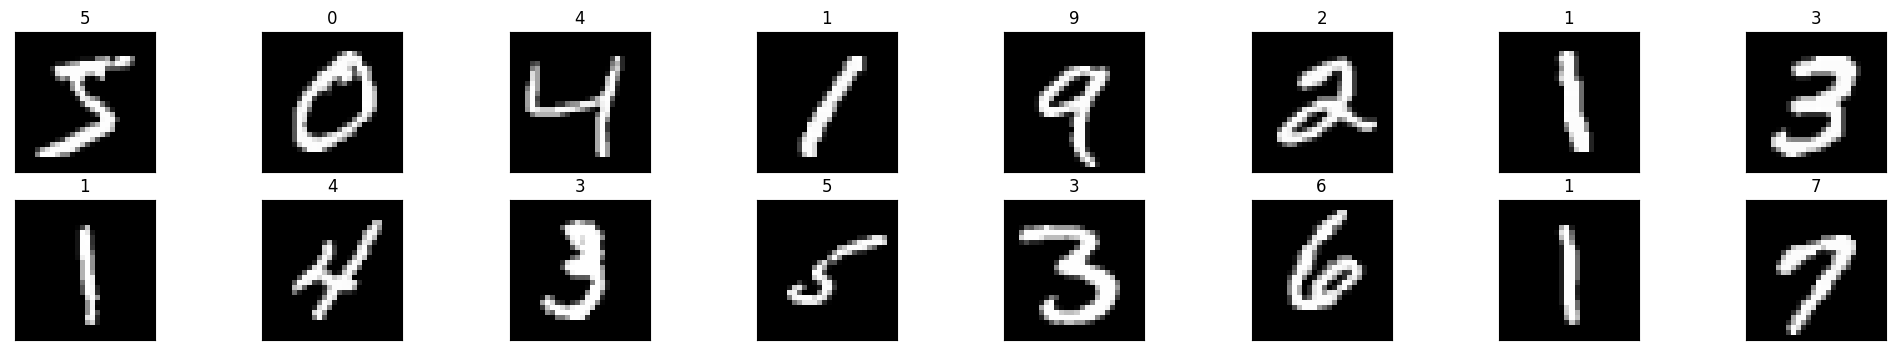

In [ ]:
import matplotlib.pyplot as plt
#%matplotlib inline

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = next(dataiter)
images = images.numpy()

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    # print out the correct label for each image
    # .item() gets the value contained in a Tensor
    ax.set_title(str(labels[idx].item()))

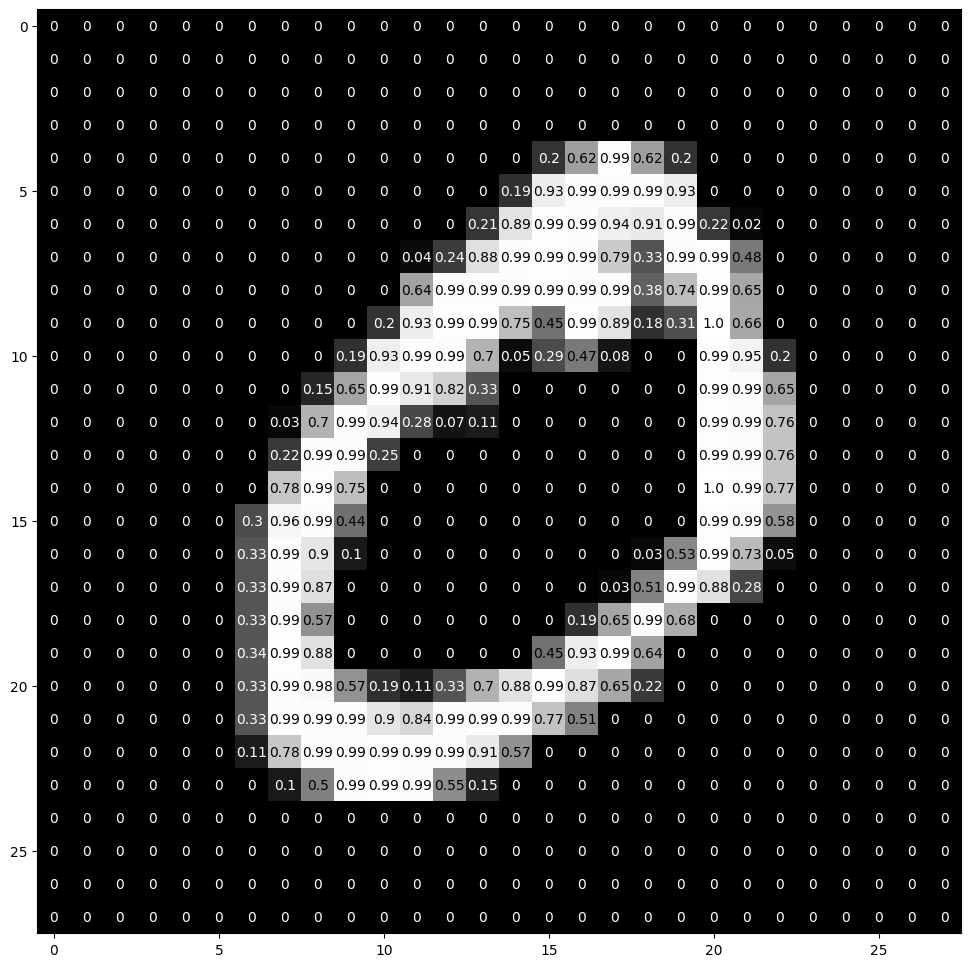

In [ ]:
img = np.squeeze(images[1])

fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')
width, height = img.shape
thresh = img.max()/2.5
for x in range(width):
    for y in range(height):
        val = round(img[x][y],2) if img[x][y] !=0 else 0
        ax.annotate(str(val), xy=(y,x),
                    horizontalalignment='center',
                    verticalalignment='center',
                    color='white' if img[x][y]<thresh else 'black')

### Определение модели

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

## TODO: Define the NN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        # linear layer (784 -> 1 hidden node)
        self.fc1 = nn.Linear(28 * 28, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)
        self.dropout = nn.Dropout(p=0.2) # google it

    def forward(self, x):
        # flatten image input
        x = x.view(-1, 28 * 28)
        # add hidden layer, with relu activation function
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

# initialize the NN
model = Net()
print(model)

Net(
  (fc1): Linear(in_features=784, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=10, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


---
### Обучение

Шаги для обучения также описаны в комментариях ниже:

1. Очистить градиенты всех оптимизированных переменных: torch за вас считает все градиенты и сохраняет их, в начале каждого шага обучения их необходимо обнулить
2. Передача вперед: вычисление прогноза модели на текущем батче
3. Вычислить ошибку
4. Обратный проход (backpropogation): вычислить градиент потерь для текущих весов модели
5. Выполните один шаг оптимизации (обновление весов)
6. Обновление средней ошибки на батче

Ну и дальше надо взять сколько-то эпох. У меня хватило 5 для хорошего результата. В дз вам надо будет добиться точности 99%, варьируя параметры модели и количество эпох.

In [ ]:
## TODO: Specify loss and optimization functions

# specify loss function
criterion = nn.CrossEntropyLoss()

# specify optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.05) # Try lr=0.05 and n_epochs=1

# number of epochs to train the model
n_epochs = 1  # suggest training between 20-50 epochs

model.train() # prep model for training (enables dropout)

for epoch in range(n_epochs):
    # monitor training loss
    train_loss = 0.0

    ###################
    # train the model #
    ###################
    for data, target in train_loader:
        # clear the gradients of all optimized variables
        optimizer.zero_grad()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # backward pass: compute gradient of the loss with respect to model parameters
        loss.backward()
        # perform a single optimization step (parameter update)
        optimizer.step()
        # update running training loss
        train_loss += loss.item()*data.size(0)

    # print training statistics
    # calculate average loss over an epoch
    train_loss = train_loss/len(train_loader.dataset)

    print('Epoch: {} \tTraining Loss: {:.6f}'.format(
        epoch+1,
        train_loss
        ))

Epoch: 1 	Training Loss: 0.343974


---
## Тестирование обученной модели

Наконец, мы тестируем нашу полученную модель на ранее невиданных **тестовых данных** и оцениваем ее производительность.

#### `model.eval()`

`model.eval(`) переведет все слои в вашей модели в режим вычисления (а не обучения). Мы же не хотим dropout на тесте.

In [ ]:
# initialize lists to monitor test loss and accuracy
test_loss = 0.0
class_correct = list(0. for i in range(10))
class_total = list(0. for i in range(10))

model.eval() # prep model for *evaluation*

for data, target in test_loader:
    # forward pass: compute predicted outputs by passing inputs to the model
    output = model(data)
    # calculate the loss
    loss = criterion(output, target)
    # update test loss
    test_loss += loss.item()*data.size(0)
    # convert output probabilities to predicted class
    _, pred = torch.max(output, 1)
    # compare predictions to true label
    correct = np.squeeze(pred.eq(target.data.view_as(pred)))
    # calculate test accuracy for each object class
    for i in range(batch_size):
        label = target.data[i]
        class_correct[label] += correct[i].item()
        class_total[label] += 1

# calculate and print avg test loss
test_loss = test_loss/len(test_loader.dataset)
print('Test Loss: {:.6f}\n'.format(test_loss))

for i in range(10):
    if class_total[i] > 0:
        print('Test Accuracy of %5s: %2d%% (%2d/%2d)' % (
            str(i), 100 * class_correct[i] / class_total[i],
            np.sum(class_correct[i]), np.sum(class_total[i])))
    else:
        print('Test Accuracy of %5s: N/A (no training examples)' % (classes[i]))

print('\nTest Accuracy (Overall): %2d%% (%2d/%2d)' % (
    100. * np.sum(class_correct) / np.sum(class_total),
    np.sum(class_correct), np.sum(class_total)))

Test Loss: 0.164956

Test Accuracy of     0: 98% (969/980)
Test Accuracy of     1: 99% (1124/1135)
Test Accuracy of     2: 91% (949/1032)
Test Accuracy of     3: 96% (977/1010)
Test Accuracy of     4: 94% (930/982)
Test Accuracy of     5: 95% (848/892)
Test Accuracy of     6: 94% (903/958)
Test Accuracy of     7: 87% (901/1028)
Test Accuracy of     8: 92% (900/974)
Test Accuracy of     9: 95% (968/1009)

Test Accuracy (Overall): 94% (9469/10000)


### Visualize Sample Test Results

This cell displays test images and their labels in this format: `predicted (ground-truth)`. The text will be green for accurately classified examples and red for incorrect predictions.

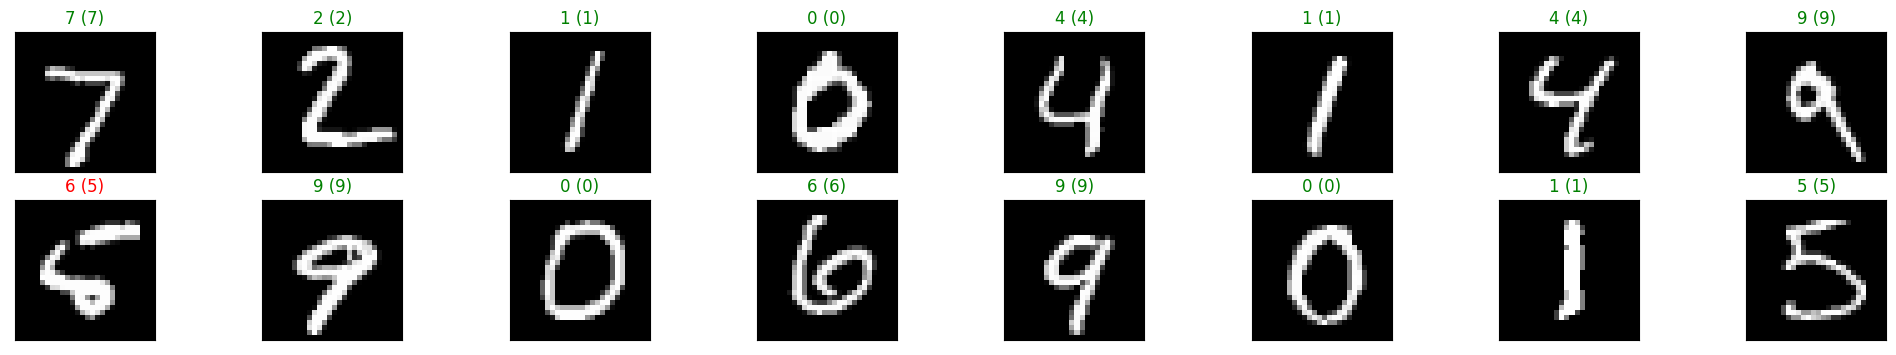

In [ ]:
# obtain one batch of test images
dataiter = iter(test_loader)
images, labels = next(dataiter)

# get sample outputs
output = model(images)
# convert output probabilities to predicted class
_, preds = torch.max(output, 1)
# prep images for display
images = images.numpy()

# plot the images in the batch, along with predicted and true labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(16):
    ax = fig.add_subplot(2, 16//2, idx+1, xticks=[], yticks=[])
    ax.imshow(np.squeeze(images[idx]), cmap='gray')
    ax.set_title("{} ({})".format(str(preds[idx].item()), str(labels[idx].item())),
                 color=("green" if preds[idx]==labels[idx] else "red"))

## Домашнее задание


### 1. Путь к успеху.

Поиграйтесь с параметрами последней модели (количество нейронов, количество слоёв, вероятность dropout, количество эпох), чтобы получить Accuracy 98.5+%.

### 2. Метрики качества.

Для любой из цифр постройте confusion matrix итоговой модели. Определите accuracy, precison и recall в классификации этой цифры.

### 3. Медицинский тест как классификатор.




Медицинские тесты, диагностирующие болезни, являются бинарными классификаторами.  Они характеризуются следующими параметрами:



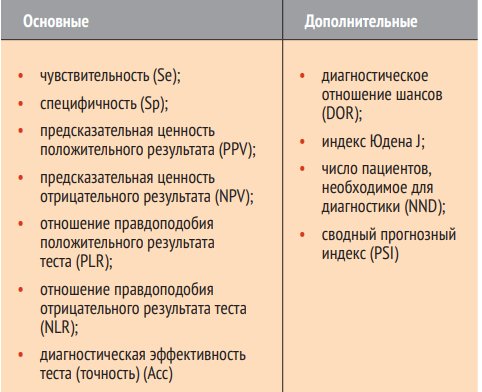

Чувствительность (Sensitivity, сокр. Se, иногда Sn): вероятность того, что результат теста будет положительным при наличии заболевания (англ. True positive rate, TPR).


$\mathrm{TPR}=\mathrm{TP} /(\mathrm{TP}+\mathrm{FN})$.

Специфичность (Specificity, сокр. Sp): вероятность того, что результат теста будет отрицательным при отсутствии заболевания (англ. True negative rate, TNR).

$TNR = TN / (\mathrm{TN}+\mathrm{FP})$.

Предсказательная ценность положительного результата (Positive predictive value, сокр. РPV): вероятность того, что заболевание присутствует, когда тест положительный.

$\mathrm{PPV}=\mathrm{TP} /(\mathrm{TP}+\mathrm{FP})$.

Предсказательная ценность отрицательного результата (Negative predictive value, сокр. NPV): вероятность того, что заболевание отсутствует, когда тест отрицательный.

$\mathrm{NPV}=\mathrm{TN} /(\mathrm{TN}+\mathrm{FN})$.

Отношение правдоподобия положительного результата теста (Positive likelihood ratio, сокр. LR+ или $\mathrm{LR}^{+}, \mathrm{plr}$ ): отношение между вероятностью положительного результата теста при наличии заболевания (TPR) и вероятностью положительного результата теста при отсутствии заболевания (False positive rate - FPR), т. е. TPR/FPR или

$$
Se / (1-\mathrm{Sp}).
$$

Отношение правдоподобия отрицательного результата теста (Negative likelihood ratio, сокр. LR-, LR-, nlr): отношение вероятности отрицательного результата теста при наличии заболевания (False negative rate - FNR) и вероятности отрицательного результата теста при отсутствии заболевания (TNR), т. е.

$$
FNR/TNR = (1-Se) / Sp.
$$

Диагностическая эффективность теста или точность (англ. Accuracy, сокр. Асc): общая вероятность того, что пациент будет правильно классифицирован, определяется как доля всех тестов, которые дают правильный результат.

$$
(TP + TN) / (TP + TN + FP +FN).
$$

Диагностическое отношение шансов (Diagnostic odds ratio - DOR) - отношение шансов теста быть положительным, если у субъекта заболевание, к шансам теста быть положительным, если у субъекта нет заболевания.

$$
DOR = (TP/FP) / (FN/TN).
$$

Индекс Юдена J (Youden's index) - это разница между TRP и FPR (долей истинно положительных результатов (чувствительностью теста) и долей ложноположительных результатов). Чем больше это различие, тем лучше работает диагностическая технология. Так как FPR - это 1-TNR, TRP - это Se, TNR - это Sp, то, соответственно,

$$
\mathrm{J}=\mathrm{TRP}-\mathrm{FPR}=\mathrm{TRP}-(1-\mathrm{TNR})=\mathrm{TRP}-1+\mathrm{TNR}=\mathrm{Se}+\mathrm{Sp}-1.
$$

Число, необходимое для диагностики (The number needed to diagnose, сокр. NND), вычисляется путем инверсии индекса Юдена (1/J) и определяется как число пациентов, которые должны быть протестированы, чтобы получить один правильный, т. е. истинно положительный, тест (результат теста). Для диагностических тестов будут желательны малые значения NND.

Сводный прогнозный индекс (англ. predictive summary index, PSI) отражает общий выигрыш в уверенности в болезни от выполнения диагностического теста:

$$
 \mathrm{PSI}=\mathrm{PPV}+ NPV-1.
$$

Обратная величина PSI предлагается как число пациентов, которые должны быть обследованы, чтобы правильно предсказать диагноз заболевания.

Кажущаяся распространенность болезни среди пациентов, участвующих в исследовании (англ. Apparent prevalence, сокр. aprev): общая вероятность того, что результат теста на наличие заболевания будет положительным относительно всех проведенных тестов.

$Aprev = (TP + \mathrm{FP}) /(\mathrm{TP}+\mathrm{TN}+\mathrm{FP}+\mathrm{FN})$.

Истинная распространенность болезни среди пациентов, участвующих в исследовании (англ. True prevalence, coкp. tprev): общая вероятность наличия заболевания относительно всех проведенных тестов.


$Tprev = (TP + FN) / (T P+T N+F P+F N)$.

По данным из таблицы определите все перечисленные параметры выше и  ответьте на поставленные вопросы
$$
\begin{array}{|c|c|c|c|c|}
\hline & & {\begin{array}{c}
\text { Клинический диагноз } \\
\text { стрептококковой ангины }
\end{array}} & \\
 & & \text { присутствует } & \text { отсутствует } & \\
\hline {\begin{array}{c}
\text { в-гемолитический } \\
\text { стрептококк в } \\
\text { посеве мазка }
\end{array}} & \text { да } & 27 & 35 & \\
 & \text { нет } & 10 & 77 & \\
\hline & & & & \\
\hline
\end{array}
$$
a) Какова вероятность того, что у больного ангиной в мазке будет обнаружен стрептококк ?

b) Какова вероятность того, что стрептококк будет обнаружен в мазке пациента, не болеющего стрептококковой ангиной ?

с) Какова вероятность того, что у пациента, не болеющего стрептококковой ангиной, не будет обнаружен стрептококк в мазке ?

d) Какова вероятность того, что пациент, у которого обнаружен в мазке стрептококк, болен ангиной ?

е) Какова вероятность того, что пациент, у которого не обнаружен в мазке стрептококк, не болен ангиной ?

f) Какие показатели соответствуют a) и b) ?

g) Какие показатели соответствуют d) и е) ?


### 4. ROC-анализ байесовского классификатора.


Вспомним пример с шулерской монетой из семинара про теорему Байеса и регуляризацию.  В нём у нас были монеты, настоящие и шулерские. Настоящая при броске выпадала с одинаковой вероятностью на каждую грань, а шулерская монета только в 40% случаев выпадала орлом.

Этот опыт можно рассматривать как байесовскую классификацию.
Пусть у нас произошло N бросков и мы рассматриваем их результат как тест на определение типа монеты. Выполните следующие задания:

- В качестве начального априорного распределения положим равновероятный вариант иметь честную и шулерскую монету.  Постройте графики зависимости вероятности того, что монета шулерская, от числа k выпадения орла при фиксированных N. В качестве N возьмите N = 2, 3, 5; 10; 100.  
Указание: для n = 100 достаточно использовать центральную предельную теорему или формулу Стирлинга для вычисления факториалов.

- Постройте  ROC-кривую - кривую зависимости TPR от FPR при варьировании порога, то есть граничного значения величины k, при котором мы считаем, что монета является шулерской. Использовать N = 2, 3, 5; 10; 100.

- Постройте график функции AUC(N) - площади под ROC-кривой. Этот параметр является агрегированной характеристикой качества классификации, не зависящей от соотношения цен ошибок. Чем больше значение AUC, тем «лучше» модель классификации. Данный показатель часто используется для сравнительного анализа нескольких моделей классификации.





###  5. Метод k-ближайших соседей (k-nearest neighbors algorithm, k-NN) для ирисов Фишера.

Предполагается, что уже имеется какое-то количество объектов с точной классификацией (т.е. для каждого них точно известно, какому классу он принадлежит). Нужно выработать правило, позволяющее отнести новый объект к одному из возможных классов (т.е. сами классы известны заранее).

В основе k-NN лежит следующее правило: объект считается принадлежащим тому классу, к которому относится большинство из k его ближайших соседей. Под «соседями» здесь понимаются объекты, близкие к исследуемому в том или ином смысле.

Vетод k-ближайших соседей включает в себя следующие этапы:

1)	введение пространства признаков и сбор данных о них;

2)	подготовка данных (масштабирование, выбор переменных);

3)	разделение первоначальной выборки на семейства;

4)	введение метрики в пространстве признаков;

5)	визуализировать разбиение на классы, и для элемента привести расстояния от него до всех остальных, упорядочив их по возрастанию;

6)	подобрать k как компромиссное значение между «выбросами» и «дисперсией» (bias-variance tradeoff), обычно порядка [$\sqrt{𝑁}$];

7)	использовать или не использовать «взвешеннное голосование»;

8)	отнести элемент к одному из классов;

9)	проанализировать работу модели – например, применив её к большому количеству новых элементов и оценив адекватность.


Реализуйте этот алгоритм для ирисов Фишера http://archive.ics.uci.edu/ml/datasets/Iris  (150 цветков).

У каждого объекта есть четыре признака: длина лепестка, ширина лепестка, длина чашелистика, ширина чашелистика.  Объектами являются три типа ирисов: setosa, versicolor, virginica.

Для простоты рассмотрим только два признака – длину лепестка и длину чашелистника. Нанесём их на диаграмму:




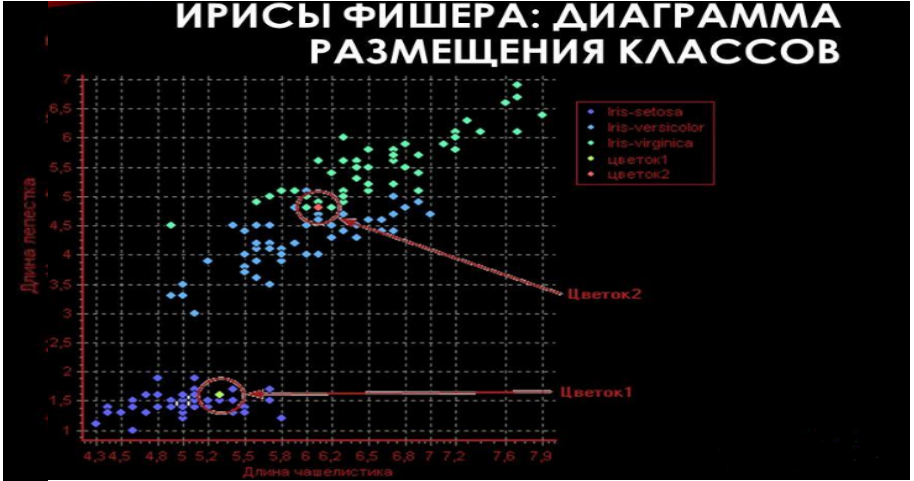

Также можно посмотреть этот набор в Википедии [Ирисы Фишера](https://ru.wikipedia.org/wiki/%D0%98%D1%80%D0%B8%D1%81%D1%8B_%D0%A4%D0%B8%D1%88%D0%B5%D1%80%D0%B0).

Используйте евклидову метрику на нормализованных данных по всем 4-м признакам.

$$
x_i \equiv \frac{x_i-\bar{x}}{s}
$$

$$
\bar{x}=\frac{1}{n} \sum_{i=1}^n x_i
$$


$$
\mathrm{s}=\cdot \sqrt{\frac{1}{n-1} \sum_{i=1}^n\left(x_i-\bar{x}\right)^2}
$$

https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html  - реализовано здесь.

- Поочередно рассматривайте каждый цветок, считая его тип неизвестным, а типы всех остальных цветков известными, и определите для каждого цветка, правильно определён тип цветка или неправильно.

- Постройте зависимость количества правильно определённых цветков от k.

- При каком k максимальное количество правильно определённых по типу цветков?


Указания к выполнению:

- можно реализовывать вручную, а можно с помощью библиотеки https://scikit-learn.ru/1-6-nearest-neighbors/

- на Хабре есть статья про kNN на примере ирисов Фишера https://habr.com/ru/articles/680004/, можете использовать куски кода оттуда, если возникают проблемы с реализацией

- также в папке семинара есть файл с лекцией МФТИ по kNN алгоритму и там тоже сделана реализация под ирисы Фишера. Код можно использовать для решения предложенной задачи.


###  6*. Логистическая регрессия с регуляризацией и стохастическим градиентным спуском.

Вам предстоит в этом задании сделать большое количество маленьких пунктов.

Загрузите [данные ](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code)по бинарной классификации астероидов в зависимости от различных параметров.

Вашей целевой переменной будет являться столбец pha. Более подробно ознакомить с датасетом вы можете также [здесь](https://www.kaggle.com/datasets/sakhawat18/asteroid-dataset/code)

In [ ]:
data = <...>
data.head()

Удалим ненужные колонки и колонки с категориальными данными

In [ ]:
data = data.drop(['id', 'spkid', 'full_name', 'pdes',
                  'name', 'prefix', 'neo', 'orbit_id',
                  'equinox', 'class'], axis=1)

# переведем таргет в столбец 0 и 1
data['pha'] = LabelEncoder().fit_transform(data['pha'])

Проверьте, есть ли среди ваших данных пропуски. Если да, то удалите их.

Как это сделать - можно посмотреть, например, тут https://devpractice.ru/pandas-work-with-nan-part4/#p3

Создайте массив признаков и массив таргета. Разбейте ваши данные на обучающую и тестовую выборки в отношении 7:3.



In [ ]:
X = <...>
y = <...>
X_train, X_test, y_train, y_test = <...>

Отмасштабируйте свои признаки.



In [ ]:
<...>


Обучите модель логистической регрессии.



In [ ]:
<...>


Сделайте предсказание для тестовой выборки и оцените качество полученного предсказания.



Как можно было увидеть ранее, оценки коэффициентов становятся слишком большими при наличии некоторых проблем с данными. Чтобы этого не происходило, часто выполняют процедуру регуляризации в модели. Вы уже сталкивались с этим в линейной регрессиия, однако регуляризацию также используют в решениях задач классификации.

Пусть дана выборка $\left(x_1, Y_1\right), \ldots,\left(x_n, Y_n\right)$, где $x_i=\left(x_{i 1}, \ldots, x_{i d}\right) \in \mathscr{X}$ и случайный класс $Y_i \sim \operatorname{Bern}\left(\sigma\left(\theta^T x_i\right)\right)$. В задаче логистической регрессии максимизируется функция правдоподобия, а точнее - ее логарифм.
$$
\begin{gathered}
L_Y(\theta)=\prod_{i=1}^n \sigma\left(\theta^T x_i\right)^{Y_i}\left(1-\sigma\left(\theta^T x_i\right)\right)^{1-Y_i} \\
\ell_Y(\theta)=\log L_Y(\theta) \\
\ell_Y(\theta) \longrightarrow \max _\theta
\end{gathered}
$$

Регуляризация заключается в искусственном усечении значений вектора оценок коэффициентов путем добавления его нормы к оптимизируемому функционалу. В случае логистической регрессии мы максимизируем функцию правдоподобия, поэтому норма добавляется со знаком минус. Тем самым решается задача
$$
\ell_Y(\theta)-\lambda\|\theta\|^2 \longrightarrow \max _\theta
$$

где $\lambda>0$ - гиперпараметр модели, то есть число, которое задается пользователем. В данном случае мы получили логистическую регрессию Ridgeрегуляризацией.

Замечание. Такая модель дает некоторое другое приближение неизвестной зависимости. Но неправильно думать, что она не может дать "правильный" ответ, потому как понятия "правильный ответ" в подобных задачах не существует. Можно получить только более качественное приближение согласно выбранной метрике.

Выпишите формулу поиска оценки коэффициентов методом градиентного спуска и стохастического градиентного спуска для

- модели логистической регрессии без регуляризации
- модели логистической регрессии c ridge-регуляризацией

Не забудьте указать, как математически определяется батч (набор объектов на каждой итерации).

Реализуйте стохастический градиентный спуск.

Выберите некоторое начальное приближение оценок коэффициентов, например, в начале координат.



Реализуйте процедуру стохастического градиентного спуска для поиска оценок коэффициентов в модели логистической регрессии. Размер батча (набор объектов на каждой итерации) обычно берут кратно степени двойки, например, 128 или 256.



Нарисуйте графики зависимости значений метрики accuracy от номера итерации для обучающей и валидационной выборок. Сколько итераций пришлось совершить?



Посчитайте ошибку на тестовой выборке.



Сделайте выводы.